In [44]:
import pandas as pd

train = pd.read_csv('train_LZdllcl.csv')
test = pd.read_csv('test_2umaH9m.csv')
train.head(150)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [45]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [47]:
def bar_chart(feature):
    promoted = train[train['is_promoted']==1][feature].value_counts()
    not_promoted = train[train['is_promoted']==0][feature].value_counts()
    df = pd.DataFrame([promoted,not_promoted])
    df.index = ['Promoted','Not Promoted']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

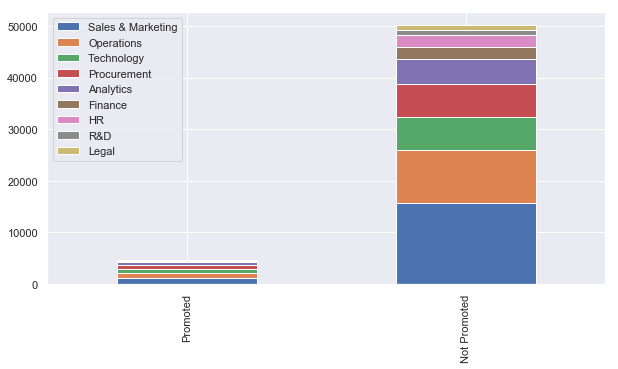

In [48]:
bar_chart('department')

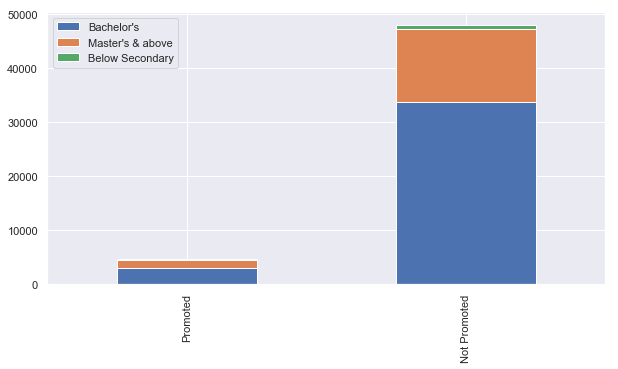

In [49]:
bar_chart('education')

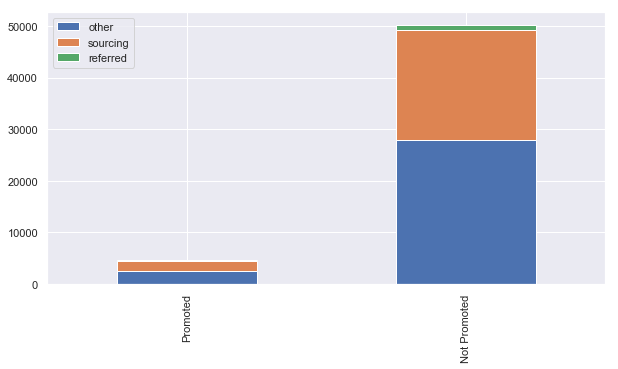

In [50]:
bar_chart('recruitment_channel')

In [51]:
train_test_data = [train, test] 
for dataset in train_test_data:
    dataset['educ'] = dataset['education']

In [52]:
    educ_mapping = {"Below Secondary": 0, "Bachelor's": 1, "Master's & above": 2}
    
    for dataset in train_test_data:
        dataset['educ'] = dataset['educ'].map(educ_mapping)

In [53]:
# fill missing educ with median educ for each department 
train["educ"].fillna(train.groupby("department")["educ"].transform("median"), inplace=True)
test["educ"].fillna(test.groupby("department")["educ"].transform("median"), inplace=True)

In [55]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,educ
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,2.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,1.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,1.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,1.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,1.0


In [56]:
# fill missing previous_year_rating with median previuos_year_rating for each length_of_service 
train["previous_year_rating"].fillna(train.groupby("length_of_service")["previous_year_rating"].transform("median"), inplace=True)
test["previous_year_rating"].fillna(test.groupby("length_of_service")["previous_year_rating"].transform("median"), inplace=True)

In [57]:
tech_mapping = {"R&D": 0 , "Legal": 1, "HR" : 2, "Finance" : 3, "Analytics" : 4, "Procurement" : 5, "Technology" : 6, "Operations" : 7, "Sales & Marketing" : 8}
for dataset in train_test_data:
    dataset['department'] = dataset['department'].map(tech_mapping)

In [58]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,educ
0,65438,8,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,2.0
1,65141,7,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,1.0
2,7513,8,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,1.0
3,2542,8,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,1.0
4,48945,6,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,1.0


In [59]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
educ                       0
dtype: int64

In [60]:
train.drop('region', axis=1, inplace=True)
#success once only

In [61]:
train.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,educ
0,65438,8,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,2.0
1,65141,7,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,1.0
2,7513,8,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,1.0
3,2542,8,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,1.0
4,48945,6,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,1.0


In [62]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,educ
0,8724,6,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77,1.0
1,74430,2,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,1.0
2,72255,8,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,1.0
3,38562,5,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,1.0
4,64486,3,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,1.0


In [63]:
test.drop('region', axis=1, inplace=True)

In [64]:
test.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,educ
0,8724,6,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77,1.0
1,74430,2,Bachelor's,f,other,1,31,3.0,5,0,0,51,1.0
2,72255,8,Bachelor's,m,other,1,31,1.0,4,0,0,47,1.0
3,38562,5,Bachelor's,f,other,3,31,2.0,9,0,0,65,1.0
4,64486,3,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,1.0


In [65]:
train.drop('employee_id' ,axis=1, inplace=True)
train.drop('education' ,axis=1, inplace=True)
test.drop('education' ,axis=1, inplace=True)

In [66]:
for dataset in train_test_data:
    dataset.loc[ dataset['age'] <= 16, 'age'] = 0,
    dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 26), 'age'] = 1,
    dataset.loc[(dataset['age'] > 26) & (dataset['age'] <= 36), 'age'] = 2,
    dataset.loc[(dataset['age'] > 36) & (dataset['age'] <= 62), 'age'] = 3,
    dataset.loc[ dataset['age'] > 62, 'age'] = 4

In [67]:
train.head()

,department,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,educ
0,8,f,sourcing,1,2,5.0,8,1,0,49,0,2.0
1,7,m,other,1,2,5.0,4,0,0,60,0,1.0
2,8,m,sourcing,1,2,3.0,7,0,0,50,0,1.0
3,8,m,other,2,3,1.0,10,0,0,50,0,1.0
4,6,m,other,1,3,3.0,2,0,0,73,0,1.0


In [68]:
test.head()

,employee_id,department,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,educ
0,8724,6,m,sourcing,1,1,3.0,1,1,0,77,1.0
1,74430,2,f,other,1,2,3.0,5,0,0,51,1.0
2,72255,8,m,other,1,2,1.0,4,0,0,47,1.0
3,38562,5,f,other,3,2,2.0,9,0,0,65,1.0
4,64486,3,m,sourcing,1,2,4.0,7,0,0,61,1.0


In [69]:
train.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [70]:
rec_mapping = {"sourcing": 0 , "other": 1, "referred" : 2}
for dataset in train_test_data:
    dataset['recruitment_channel'] = dataset['recruitment_channel'].map(rec_mapping)

In [71]:
train.head()

,department,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,educ
0,8,f,0,1,2,5.0,8,1,0,49,0,2.0
1,7,m,1,1,2,5.0,4,0,0,60,0,1.0
2,8,m,0,1,2,3.0,7,0,0,50,0,1.0
3,8,m,1,2,3,1.0,10,0,0,50,0,1.0
4,6,m,1,1,3,3.0,2,0,0,73,0,1.0


In [72]:
train.drop('gender' ,axis=1 ,inplace=True)

In [73]:
test.drop('gender' ,axis=1 ,inplace=True)

In [74]:
train.head()

,department,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,educ
0,8,0,1,2,5.0,8,1,0,49,0,2.0
1,7,1,1,2,5.0,4,0,0,60,0,1.0
2,8,0,1,2,3.0,7,0,0,50,0,1.0
3,8,1,2,3,1.0,10,0,0,50,0,1.0
4,6,1,1,3,3.0,2,0,0,73,0,1.0


In [75]:
test.head()

,employee_id,department,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,educ
0,8724,6,0,1,1,3.0,1,1,0,77,1.0
1,74430,2,1,1,2,3.0,5,0,0,51,1.0
2,72255,8,1,1,2,1.0,4,0,0,47,1.0
3,38562,5,1,3,2,2.0,9,0,0,65,1.0
4,64486,3,0,1,2,4.0,7,0,0,61,1.0


In [76]:
train_data = train.drop('is_promoted', axis=1)
target = train['is_promoted']

train_data.shape, target.shape

((54808, 10), (54808,))

In [77]:
train_data.head()

,department,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,educ
0,8,0,1,2,5.0,8,1,0,49,2.0
1,7,1,1,2,5.0,4,0,0,60,1.0
2,8,0,1,2,3.0,7,0,0,50,1.0
3,8,1,2,3,1.0,10,0,0,50,1.0
4,6,1,1,3,3.0,2,0,0,73,1.0


In [78]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 11 columns):
department              54808 non-null int64
recruitment_channel     54808 non-null int64
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
educ                    54808 non-null float64
dtypes: float64(2), int64(9)
memory usage: 4.6 MB


In [80]:
train.head(30)

,department,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,educ
0,8,0,1,2,5.0,8,1,0,49,0,2.0
1,7,1,1,2,5.0,4,0,0,60,0,1.0
2,8,0,1,2,3.0,7,0,0,50,0,1.0
3,8,1,2,3,1.0,10,0,0,50,0,1.0
4,6,1,1,3,3.0,2,0,0,73,0,1.0
5,4,0,2,2,3.0,7,0,0,85,0,1.0
6,7,1,1,2,3.0,5,0,0,59,0,1.0
7,7,0,1,2,3.0,6,0,0,63,0,2.0
8,4,1,1,2,4.0,5,0,0,83,0,1.0
9,8,0,1,2,5.0,5,1,0,54,0,2.0


In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [83]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.93194673 0.92939245 0.93048714 0.93139938 0.9295749  0.92921
 0.92264185 0.92866265 0.93175182 0.92737226]


In [84]:
#Accuracy by kNN
round(np.mean(score)*100,6)

92.924392

In [56]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

E:\Anaconda Python3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda Python3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda Python3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda Python3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default valu

[0.9412516  0.93796752 0.94015691 0.93997446 0.93705528 0.93778508
 0.93030469 0.93614304 0.94014599 0.93412409]


In [53]:
round(np.mean(score)*100,2)

92.92

In [54]:
#predicting by kNN
clf = KNeighborsClassifier(n_neighbors = 13)
clf.fit(train_data, target)

test_data = test.drop("employee_id", axis=1).copy()
predictionn = clf.predict(test_data)

In [59]:
#prediction by SVC
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("employee_id", axis=1).copy()
prediction = clf.predict(test_data)

E:\Anaconda Python3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [55]:
submission = pd.DataFrame({
   "Promotion_id":prediction,
    "Employee ID":test["employee_id"],
    "department": test["department"],
    "recruitment_channel":test["recruitment_channel"], 
   "Education":test["educ"],
    "Promotion": prediction
    
    
    })

submission.to_csv('promotion_submission.csv', index=False)

In [58]:
for dataset in submission:
    submission.loc[ submission['Promotion_id'] == 0, 'Promotion'] = "No",
    submission.loc[ submission['Promotion_id'] == 1, 'Promotion'] = "Yes"

In [61]:
submission = pd.read_csv('promotion_submission.csv')
submission.head(50)

,Promotion_id,Employee ID,department,recruitment_channel,Education,Promotion
0,0,8724,6,0,1.0,0
1,0,74430,2,1,1.0,0
2,0,72255,8,1,1.0,0
3,0,38562,5,1,1.0,0
4,0,64486,3,0,1.0,0
5,0,46232,5,0,1.0,0
6,0,54542,3,1,1.0,0
7,0,67269,4,0,1.0,0
8,0,66174,6,1,2.0,0
9,0,76303,6,0,1.0,0
